## Over View

### I was tasked with predicting employee salaries from different employee characteristics (or features). 
### The data was collected by asking employees working in four different fields to state their salary and some background information.

### I have imported the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr, pearsonr
import scipy as sp

In [2]:
df = pd.read_csv('salary.csv')

### I want to see what sort of data I am working with. This will help me determine if it needs any processing.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        513 non-null int64
yearsworked    513 non-null int64
yearsrank      513 non-null int64
market         513 non-null float64
degree         513 non-null int64
otherqual      513 non-null int64
position       513 non-null int64
male           513 non-null int64
Field          513 non-null int64
yearsabs       513 non-null int64
dtypes: float64(2), int64(9)
memory usage: 48.1 KB


In [4]:
df.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [5]:
df.head(10)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
5,56000.0,1,0,0,1.19,1,0,1,1,1,0
6,61008.0,0,2,2,1.33,1,0,1,1,2,0
7,39986.0,0,2,0,0.99,1,0,1,1,4,0
8,36308.0,0,2,1,0.85,1,0,1,1,1,1
9,55000.0,0,0,0,1.23,1,0,1,1,1,1


### Are there any missing values
#### There was one missing value in the salary column and once I found it, I used df = df.dropna() to remove the na value.

In [6]:
nan_values = len(df) - df.count()

print(nan_values)

df = df.dropna()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64


### Max Salary Value

In [7]:
salary_max = df.salary.max()

print(salary_max)

96156.0


### MIn Salary Value

In [8]:
salary_min = df.salary.min()

print(salary_min)

29000.0


### Mean and Standard Error

In [9]:
mean = df['salary'].mean()

standard_error = df['salary'].sem()

print(mean)
print(standard_error)


50863.22009783625
560.0622753925232


### Standard Deviation

In [10]:
standard_deviation = df['yearsworked'].std()

print(standard_deviation)

9.447040460636984


### Median

In [11]:
median_salary = df['salary'].median()

print(median_salary)

50096.0


### Interquartile Range

In [12]:
salary_interquartile_range = iqr(df['salary'], rng=(25,75), interpolation='midpoint')

print(salary_interquartile_range)

20345.0


### How many men and women are there in the data set

In [13]:
gender = df['male'].value_counts()

print(gender)

Male = gender.iloc[0]
Female = gender.iloc[1]

gender_t = [{'Male': Male,
            'Female': Female}]

gender_t = pd.DataFrame(gender_t)

gender_t.rename(index={0:'Values'}, inplace=True)
 
gender_t

1    385
0    128
Name: male, dtype: int64


,Female,Male
Values,128,385


### Women exectives compared to male

In [14]:
female_executives = df[(df['male']==0) & (df['position']==3)]
female_executives_count = female_executives.shape[0]
print('There are' ,female_executives_count,'Female executives')

male_executives = df[(df['male']==1) & (df['position']==3)]
male_executives_count = male_executives.shape[0]
print('There are' ,male_executives_count,'male executives')

male_female_diff = male_executives_count - female_executives_count 

print('There are',male_female_diff,'less women executives than male executives')

There are 19 Female executives
There are 191 male executives
There are 172 less women executives than male executives


### Histogram for the salary variable

Text(0, 0.5, 'Number of people')

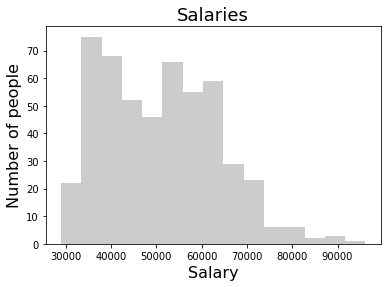

In [15]:
salary = df['salary']

sns.distplot(salary, kde=False, color='grey', bins=15)
plt.title('Salaries', fontsize=18)
plt.xlabel('Salary', fontsize=16)
plt.ylabel('Number of people', fontsize=16)

### What is the distribution of the plot?

#### The histogram has a right tailed distribution

### Average Salaries between men and women

Text(0, 0.5, 'Number of people')

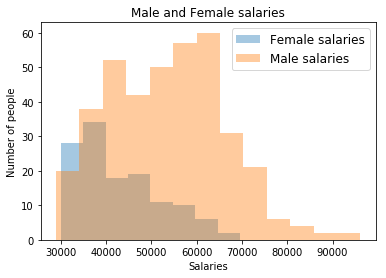

In [16]:
female = df[(df['male']==0) & (df['salary'])]
male = df[(df['male']==1) & (df['salary'])]

female_salaries = female.filter(['salary'], axis=1)
male_salaries = male.filter(['salary'], axis=1)

sns.distplot(female_salaries,  kde=False, label='Female salaries')
sns.distplot(male_salaries,  kde=False,label='Male salaries')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Male and Female salaries')
plt.xlabel('Salaries')
plt.ylabel('Number of people')

In [17]:
# Average
female_salaries_mean = female['salary'].mean()
male_salaries_mean = male['salary'].mean()

print(female_salaries_mean)
print(male_salaries_mean)

# For the error bars
female_salaries_std = female_salaries.std()
male_salaries_std = male_salaries.std()

print(female_salaries_std)
print(male_salaries_std)

42916.60479734375
53505.21167825973
salary    9161.609591
dtype: float64
salary    12599.304199
dtype: float64


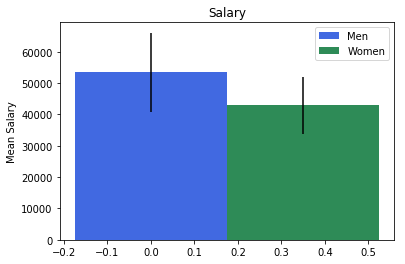

In [18]:
N = 1
menMeans = (53505.21167825973)
menStd =   (12599.304199)

ind = np.arange(N)
width = 0.35

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='royalblue', yerr=menStd)

womenMeans = (42916.60479734375)
womenStd =   (9161.609591)
rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen', yerr=womenStd)

# add some
ax.set_ylabel('Mean Salary')
ax.set_title('Salary')
ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

### Scatter plot for years worked compared with salary

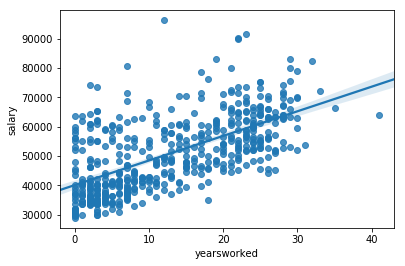

In [19]:
sns.regplot(x=df["yearsworked"], y=df["salary"])

### Insights
#### This plot has a positive correlation, this means that as the x-value increases (yearsworked) so does the y-value (salary)
#### The plot shows a couple of anomalies but nothing that will drastically affect the plot.

### Pearson correlation coefficient

In [20]:
pearsonr(df['yearsworked'], df['salary'])

(0.6235888657598045, 1.2873351342921916e-56)

### Insights 
#### Pearson’s correlation coefficient = 0.6235888657598045 which shows a positive relationship

#### 2-tailed p-value = 1.2873351342921916e-56
#### A p-value of 1.2 shows that there is an insignificant relationship.
#### The higher the p-value the less significant the relationship is